# ML Second  Project <div dir='\n'> 
Fatemeh Karimi Barikarasfi <div dir='\n'> 610301060

Use

    - Decision Tree
    - Random Forest
    - XGBoost
    - SVM
    - MLP
    - ELM
    -Autoencoder
methoods for classification of the data in the below link, the data is speech signal for Parkinson's disease classification.

[Speech singnal for Parkinson's disease classification](https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification#)

## Importing Needed Libraries

In [1]:
import numpy 
import pandas 
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
import sklearn.pipeline
import sklearn.base
import sklearn.tree
import sklearn.ensemble
import sklearn.svm
import tensorflow

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

## Loading and Prepering Data

In [7]:
data_set = pandas.read_csv('/gdrive/MyDrive/pd_speech_features.csv')
data_set

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,250,0,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,...,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671,0
753,250,0,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417,0
754,251,0,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
755,251,0,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [8]:
data_set.columns = data_set.iloc[0]
data_set.drop(0, axis = 0, inplace = True)
data_set.index = numpy.arange(0, len(data_set))

In [9]:
data_set.dtypes

0
id                           object
gender                       object
PPE                          object
DFA                          object
RPDE                         object
                              ...  
tqwt_kurtosisValue_dec_33    object
tqwt_kurtosisValue_dec_34    object
tqwt_kurtosisValue_dec_35    object
tqwt_kurtosisValue_dec_36    object
class                        object
Length: 755, dtype: object

In [ ]:
data = numpy.array(data_set)
numpy.random.shuffle(data)
data_set =pandas.DataFrame(data, columns = data_set.columns)
data_set.drop('id', axis = 1, inplace = True)
y_data_set = numpy.array(data_set['class'])
x_data_set = data_set.drop(['class'], axis = 1, inplace = False)
x_data_set = numpy.array(x_data_set)
x_data_set = x_data_set.astype('float')
y_data_set = y_data_set.astype('int')
x_data_set = sklearn.preprocessing.normalize(x_data_set, norm='l2', axis=0)

### Spliting Data into Train and Test Set

In [15]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_data_set, y_data_set, test_size = 0.3, random_state = 42, stratify = y_data_set)

## Models

### Decision Tree

In [16]:
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20, None]}
decision_tree = sklearn.tree.DecisionTreeClassifier()
decision_tree_model = sklearn.model_selection.GridSearchCV(decision_tree, param_grid_dt, scoring = 'accuracy', cv = 5)
decision_tree_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, None]},
             scoring='accuracy')

In [17]:
decision_tree_model.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [18]:
y_hat_decision_tree_model = decision_tree_model.predict(x_test)
CM_decision_tree_model = sklearn.metrics.confusion_matrix(y_test, y_hat_decision_tree_model)
CM_decision_tree_model

array([[ 31,  27],
       [ 17, 152]])

### Random Forest

In [19]:
param_grid_rf = {'n_estimators': [10, 20, 30, 40, 50], 'criterion': ['gini', 'entropy']}
random_forest = sklearn.ensemble.RandomForestClassifier()
random_forest_model = sklearn.model_selection.GridSearchCV(random_forest, param_grid_rf, scoring = 'accuracy', cv = 5)
random_forest_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [20]:
random_forest_model.best_params_

{'criterion': 'gini', 'n_estimators': 50}

In [21]:
y_hat_random_forest_model = random_forest_model.predict(x_test)
CM_random_forest_model = sklearn.metrics.confusion_matrix(y_test, y_hat_random_forest_model)
CM_random_forest_model

array([[ 29,  29],
       [  8, 161]])

### XGBoost

In [22]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)

XGBClassifier()

In [25]:
y_hat_xgboost_model = xgboost_model.predict(x_test)
CM_xgboost_model = sklearn.metrics.confusion_matrix(y_test, y_hat_xgboost_model)
CM_xgboost_model

array([[ 32,  26],
       [  2, 167]])

### SVM

#### SVM ( kernel = Linear )

In [26]:
svm_linear_model = sklearn.svm.LinearSVC()
svm_linear_model.fit(x_train, y_train)

LinearSVC()

In [27]:
y_hat_svm_linear_model = svm_linear_model.predict(x_test)
CM_svm_linear_model = sklearn.metrics.confusion_matrix(y_test, y_hat_svm_linear_model)
CM_svm_linear_model

array([[ 26,  32],
       [  2, 167]])

#### SVM ( kernel = Poly )

In [28]:
param_grid_svm_poly = {'degree': [2, 3, 4]}
svm_poly = sklearn.svm.SVC(kernel = 'poly', decision_function_shape = 'ovr')
svm_poly_model = sklearn.model_selection.GridSearchCV(svm_poly, param_grid_svm_poly, scoring = 'accuracy', cv = 5)
svm_poly_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'degree': [2, 3, 4]}, scoring='accuracy')

In [29]:
svm_poly_model.best_params_

{'degree': 2}

In [30]:
y_hat_svm_poly_model = svm_poly_model.predict(x_test)
CM_svm_poly_model = sklearn.metrics.confusion_matrix(y_test, y_hat_svm_poly_model)
CM_svm_poly_model

array([[ 20,  38],
       [  1, 168]])

#### SVM ( kernel = rbf )

In [31]:
param_grid_svm_rbf = {'C': [1, 10, 100, 200, 500, 1000]}
svm_rbf = sklearn.svm.SVC(kernel = 'rbf', decision_function_shape = 'ovr')
svm_rbf_model = sklearn.model_selection.GridSearchCV(svm_rbf, param_grid_svm_rbf, scoring = 'accuracy', cv = 5)
svm_rbf_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 200, 500, 1000]},
             scoring='accuracy')

In [32]:
svm_rbf_model.best_params_

{'C': 10}

In [33]:
y_hat_svm_rbf_model = svm_rbf_model.predict(x_test)
CM_svm_rbf_model = sklearn.metrics.confusion_matrix(y_test, y_hat_svm_rbf_model)
CM_svm_rbf_model

array([[ 31,  27],
       [  5, 164]])

### MLP

In [ ]:
MLP_model = tensorflow.keras.models.Sequential()

MLP_model.add(tensorflow.keras.layers.Dense(units = 753, activation = 'relu'))
MLP_model.add(tensorflow.keras.layers.Dense(units = 50, activation = 'relu'))
MLP_model.add(tensorflow.keras.layers.Dense(units = 50, activation = 'relu'))
MLP_model.add(tensorflow.keras.layers.Dense(units = 50, activation = 'relu'))
MLP_model.add(tensorflow.keras.layers.Dense(units = 50, activation = 'relu'))
MLP_model.add(tensorflow.keras.layers.Dense(units = 10, activation = 'relu'))
MLP_model.add(tensorflow.keras.layers.Dense(units = 2 , activation = 'sigmoid'))

MLP_model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
MLP_model.fit(x_train, tensorflow.keras.utils.to_categorical(y_train), batch_size=32, epochs=100)

In [35]:
loss_MLP_model, accuracy_MLP_model = MLP_model.evaluate(x_test, tensorflow.keras.utils.to_categorical(y_test))

8/8 [==============================] - 0s 3ms/step - loss: 1.5721 - accuracy: 0.8370


In [36]:
p_MLP = MLP_model.predict(x_test)
y_hat_MLP = numpy.empty(len(x_test))
for i in range(0, len(p_MLP)):
  if (p_MLP[i][0] >= p_MLP[i][1]):
    y_hat_MLP[i] = 0
  else:
    y_hat_MLP[i] = 1

CM_MLP_model = sklearn.metrics.confusion_matrix(y_test, y_hat_MLP)
CM_MLP_model

8/8 [==============================] - 0s 2ms/step


array([[ 34,  24],
       [ 13, 156]])

### Autoencoder

Autoencoder is used for feature extraction. so, fisrt the autoencoder is built and then use the encoder + a classifier for prediction.

In [ ]:
# encoder
inputs = Input(shape = (x_train.shape[1],))
x = inputs
x = Dense(units = 400, activation = 'relu')(x)
x = Dense(units = 200, activation = 'relu')(x)
x = Dense(units = 100, activation = 'relu')(x)
latent = Dense(units = 50 , activation = 'relu')(x)

encoder = Model(inputs, latent, name = 'encoder')

# decoder
latent_inputs = Input(shape = (50, ))
x = Dense(units = 100, activation = 'relu')(latent_inputs)
x = Dense(units = 200, activation = 'relu')(x)
x = Dense(units = 400, activation = 'relu')(x)
x = Dense(units = x_train.shape[1], activation = 'relu')(x)

decoder = Model(latent_inputs, x, name = 'decoder')

#autoencoder
autoencoder_model = Model(inputs, decoder(encoder(inputs)), name = 'autoencoder')


autoencoder_model.compile(optimizer='adam' , loss='mse')
autoencoder_model.fit(x_train, x_train, batch_size=32, epochs=100, validation_data=(x_test, x_test))

In [38]:
autoencoder_model.evaluate(x_test, x_test)

8/8 [==============================] - 0s 3ms/step - loss: 6.1405e-04


0.0006140544428490102

#### Feature Extraction from Train and Test Data by Encoder

In [39]:
x_train_selected = encoder.predict(x_train)
x_test_selected = encoder.predict(x_test)

8/8 [==============================] - 0s 2ms/step


### Encoder + MLP

In [ ]:
EnMLP_model = tensorflow.keras.models.Sequential()
EnMLP_model.add(tensorflow.keras.layers.Dense(units = 50, activation = 'relu'))
EnMLP_model.add(tensorflow.keras.layers.Dense(units = 10, activation = 'relu'))
EnMLP_model.add(tensorflow.keras.layers.Dense(units = 10, activation = 'relu'))
EnMLP_model.add(tensorflow.keras.layers.Dense(units = 2 , activation = 'sigmoid'))

EnMLP_model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
EnMLP_model.fit(x_train_selected, tensorflow.keras.utils.to_categorical(y_train) , batch_size=32, epochs=100)

In [41]:
loss_EnMLP_model, accuracy_EnMLP = EnMLP_model.evaluate(x_test_selected, tensorflow.keras.utils.to_categorical(y_test))

8/8 [==============================] - 0s 4ms/step - loss: 0.4638 - accuracy: 0.8326


In [42]:
p_EnMLP = EnMLP_model.predict(x_test_selected)
y_hat_EnMLP = numpy.empty(len(x_test))
for i in range(0, len(p_EnMLP)):
  if (p_EnMLP[i][0] >= p_EnMLP[i][1]):
    y_hat_EnMLP[i] = 0
  else:
    y_hat_EnMLP[i] = 1

CM_EnMLP_model = sklearn.metrics.confusion_matrix(y_test, y_hat_EnMLP)
CM_EnMLP_model

8/8 [==============================] - 0s 3ms/step


array([[ 27,  31],
       [  7, 162]])

### Encode + Decision Tree

In [43]:
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20, None]}
en_decision_tree = sklearn.tree.DecisionTreeClassifier()
en_decision_tree_model = sklearn.model_selection.GridSearchCV(en_decision_tree, param_grid_dt, scoring = 'accuracy', cv = 5)
en_decision_tree_model.fit(x_train_selected, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, None]},
             scoring='accuracy')

In [44]:
en_decision_tree_model.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [45]:
y_hat_en_decision_tree_model = en_decision_tree_model.predict(x_test_selected)
CM_en_decision_tree_model = sklearn.metrics.confusion_matrix(y_test, y_hat_en_decision_tree_model)
CM_en_decision_tree_model

array([[ 21,  37],
       [ 11, 158]])

### Encoder + Random Forest

In [46]:
param_grid_rf = {'n_estimators': [10, 20, 30, 40, 50], 'criterion': ['gini', 'entropy']}
en_random_forest = sklearn.ensemble.RandomForestClassifier()
en_random_forest_model = sklearn.model_selection.GridSearchCV(en_random_forest, param_grid_rf, scoring = 'accuracy', cv = 5)
en_random_forest_model.fit(x_train_selected, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [47]:
en_random_forest_model.best_params_

{'criterion': 'gini', 'n_estimators': 40}

In [48]:
y_hat_en_random_forest_model = en_random_forest_model.predict(x_test_selected)
CM_en_random_forest_model = sklearn.metrics.confusion_matrix(y_test, y_hat_random_forest_model)
CM_en_random_forest_model

array([[ 29,  29],
       [  8, 161]])

### Encoder + XGBoost

In [49]:
en_xgboost_model = XGBClassifier()
en_xgboost_model.fit(x_train_selected, y_train)

XGBClassifier()

In [50]:
y_hat_en_xgboost_model = en_xgboost_model.predict(x_test_selected)
CM_en_xgboost_model = sklearn.metrics.confusion_matrix(y_test, y_hat_xgboost_model)
CM_en_xgboost_model

array([[ 32,  26],
       [  2, 167]])

### Autoencoder + SVM ( kernel = Linear )

In [51]:
en_svm_linear_model = sklearn.svm.LinearSVC()
en_svm_linear_model.fit(x_train_selected, y_train)

LinearSVC()

In [53]:
y_hat_en_svm_linear_model = en_svm_linear_model.predict(x_test_selected)
CM_en_svm_linear_model = sklearn.metrics.confusion_matrix(y_test, y_hat_en_svm_linear_model)
CM_en_svm_linear_model

array([[ 24,  34],
       [  5, 164]])

### Autoencoder + SVM ( kernel = Poly )

In [54]:
param_grid_svm_poly = {'degree': [2, 3, 4]}
en_svm_poly = sklearn.svm.SVC(kernel = 'poly', decision_function_shape = 'ovr')
en_svm_poly_model = sklearn.model_selection.GridSearchCV(en_svm_poly, param_grid_svm_poly, scoring = 'accuracy', cv = 5)
en_svm_poly_model.fit(x_train_selected, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'degree': [2, 3, 4]}, scoring='accuracy')

In [55]:
en_svm_poly_model.best_params_

{'degree': 3}

In [56]:
y_hat_en_svm_poly_model = en_svm_poly_model.predict(x_test_selected)
CM_en_svm_poly_model = sklearn.metrics.confusion_matrix(y_test, y_hat_en_svm_poly_model)
CM_en_svm_poly_model

array([[ 20,  38],
       [  5, 164]])

### Autoencoder + SVM ( kernel = rbf )

In [57]:
param_grid_svm_rbf = {'C': [1, 10, 100, 200, 500, 1000]}
en_svm_rbf = sklearn.svm.SVC(kernel = 'rbf', decision_function_shape = 'ovr')
en_svm_rbf_model = sklearn.model_selection.GridSearchCV(en_svm_rbf, param_grid_svm_rbf, scoring = 'accuracy', cv = 5)
en_svm_rbf_model.fit(x_train_selected, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 200, 500, 1000]},
             scoring='accuracy')

In [58]:
en_svm_rbf_model.best_params_

{'C': 10}

In [59]:
y_hat_en_svm_rbf_model = en_svm_rbf_model.predict(x_test_selected)
CM_en_svm_rbf_model = sklearn.metrics.confusion_matrix(y_test, y_hat_en_svm_rbf_model)
CM_en_svm_rbf_model

array([[ 24,  34],
       [  5, 164]])

# EML

In [67]:
class ELMClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, hidden_size=200, activation="sigmoid"):
        self.hidden_size = hidden_size
        self.activation = activation

        self._input_size = 753
        self._hidden_size = self.hidden_size
        self._output_size = 2

        self._activation = {
            "sigmoid": lambda x: 1. / (1. + numpy.exp(-x)),
            "relu": lambda x: numpy.where(x < 0, numpy.zeros(x.shape), x)
        }[self.activation]

        self._beta = numpy.random.uniform(-1., 1., size=(self._hidden_size, self._output_size))
        self._w = numpy.random.uniform(-1, 1, size=(self._input_size, self._hidden_size))
        self._bias = numpy.zeros(shape=(self._hidden_size,))

    def fit(self, X, y):
        H = self._activation(X @ self._w + self._bias)
        H_pinv = numpy.linalg.pinv(H)
        self._beta = H_pinv @ numpy.eye(numpy.max(y) + 1)[y]

    def predict(self, X):
        H = self._activation(X @ self._w + self._bias)
        return numpy.argmax(H @ self._beta, axis=-1)

    def predict_proba(self, X):
        pass

elm_model = sklearn.model_selection.GridSearchCV(
    estimator=sklearn.pipeline.Pipeline([
        ("standardizer", sklearn.preprocessing.StandardScaler()),
        ("classifier", ELMClassifier())
    ]),
    param_grid={
        "classifier__hidden_size": [200, 500, 1000, 5000, 10000, 50000],
        "classifier__activation": ["sigmoid", "relu"],
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(x_train, y_train)

In [68]:
elm_model.best_params_

{'classifier__activation': 'sigmoid', 'classifier__hidden_size': 50000}

In [69]:
y_hat_elm_model = elm_model.predict(x_test)
CM_elm_model = sklearn.metrics.confusion_matrix(y_test, y_hat_elm_model)
CM_elm_model

array([[ 35,  23],
       [  8, 161]])

# Results

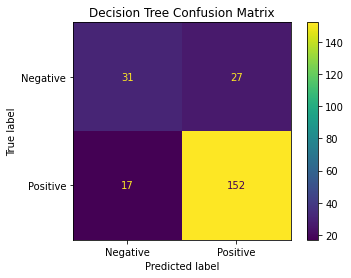

In [70]:
sklearn.metrics.ConfusionMatrixDisplay(CM_decision_tree_model, display_labels = ['Negative', 'Positive'], ).plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

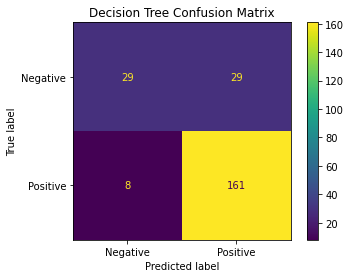

In [97]:
sklearn.metrics.ConfusionMatrixDisplay(CM_random_forest_model, display_labels = ['Negative', 'Positive'], ).plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

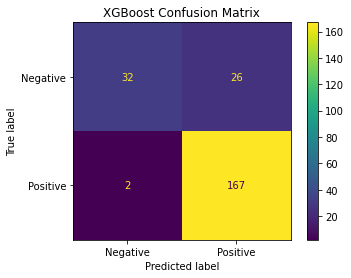

In [98]:
sklearn.metrics.ConfusionMatrixDisplay(CM_xgboost_model, display_labels = ['Negative', 'Positive'], ).plot()
plt.title('XGBoost Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'SVM(kernek = Linear) Confusion Matrix')

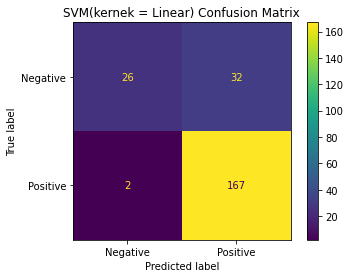

In [99]:
sklearn.metrics.ConfusionMatrixDisplay(CM_svm_linear_model, display_labels = ['Negative', 'Positive']).plot()
plt.title('SVM(kernek = Linear) Confusion Matrix')

Text(0.5, 1.0, 'SVM(kernel = Poly) Confusion Matrix')

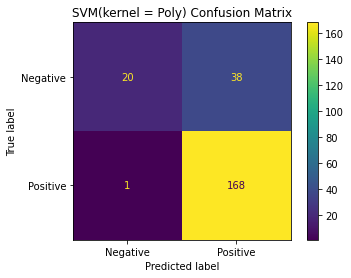

In [100]:
sklearn.metrics.ConfusionMatrixDisplay(CM_svm_poly_model, display_labels = ['Negative', 'Positive']).plot()
plt.title('SVM(kernel = Poly) Confusion Matrix')

Text(0.5, 1.0, 'SVM(kernel = rbf) Confusion Matrix')

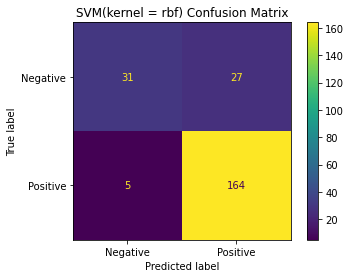

In [101]:
sklearn.metrics.ConfusionMatrixDisplay(CM_svm_rbf_model, display_labels = ['Negative', 'Positive']).plot()
plt.title('SVM(kernel = rbf) Confusion Matrix')

Text(0.5, 1.0, 'MLP Confusion Matrix')

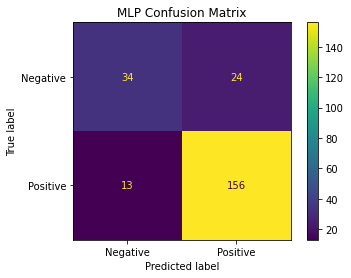

In [102]:
sklearn.metrics.ConfusionMatrixDisplay(CM_MLP_model, display_labels = ['Negative', 'Positive']).plot()
plt.title('MLP Confusion Matrix')

Text(0.5, 1.0, 'Autoencoder + MLP Confusion Matrix')

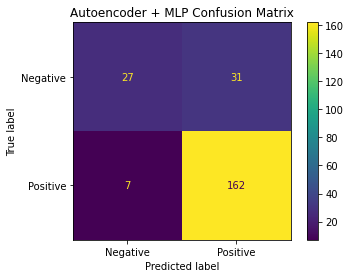

In [103]:
sklearn.metrics.ConfusionMatrixDisplay(CM_EnMLP_model, display_labels = ['Negative', 'Positive']).plot()
plt.title('Autoencoder + MLP Confusion Matrix')

Text(0.5, 1.0, 'Autoencoder + Decision Tree Confusion Matrix')

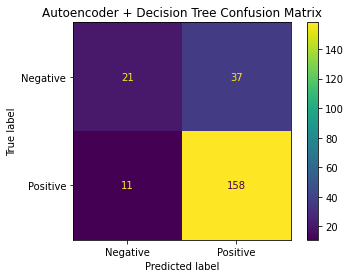

In [104]:
sklearn.metrics.ConfusionMatrixDisplay(CM_en_decision_tree_model, display_labels = ['Negative', 'Positive']).plot()
plt.title('Autoencoder + Decision Tree Confusion Matrix')

Text(0.5, 1.0, 'Autoencoder + Random Forest Confusion Matrix')

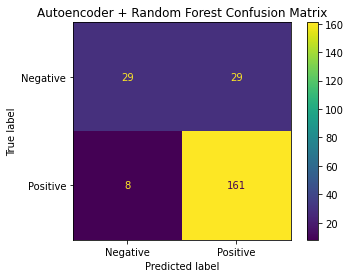

In [105]:
sklearn.metrics.ConfusionMatrixDisplay(CM_en_random_forest_model, display_labels = ['Negative', 'Positive']).plot()
plt.title('Autoencoder + Random Forest Confusion Matrix')

Text(0.5, 1.0, 'Autoencoder + XGBoost Confusion Matrix')

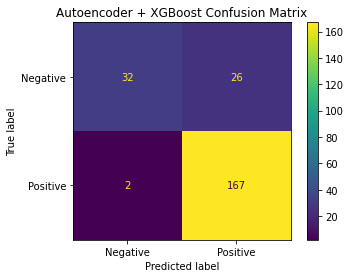

In [106]:
sklearn.metrics.ConfusionMatrixDisplay(CM_en_xgboost_model, display_labels = ['Negative', 'Positive']).plot()
plt.title('Autoencoder + XGBoost Confusion Matrix')

Text(0.5, 1.0, 'Autoencoder + SVM (kernel = Linear) Confusion Matrix')

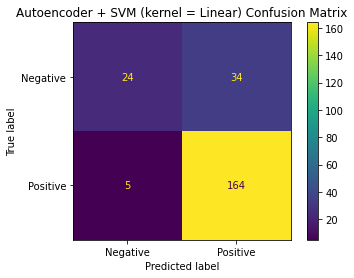

In [107]:
sklearn.metrics.ConfusionMatrixDisplay(CM_en_svm_linear_model, display_labels = ['Negative', 'Positive']).plot()
plt.title('Autoencoder + SVM (kernel = Linear) Confusion Matrix')

Text(0.5, 1.0, 'Autoencoder + SVM (kernel = Poly) Confusion Matrix')

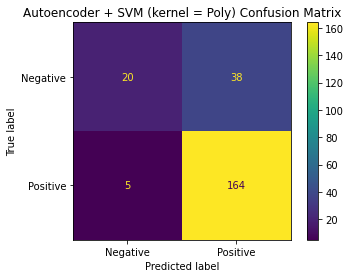

In [108]:
sklearn.metrics.ConfusionMatrixDisplay(CM_en_svm_poly_model, display_labels = ['Negative', 'Positive']).plot()
plt.title('Autoencoder + SVM (kernel = Poly) Confusion Matrix')

Text(0.5, 1.0, 'Autoencoder + SVM (kernel = rbf) Confusion Matrix')

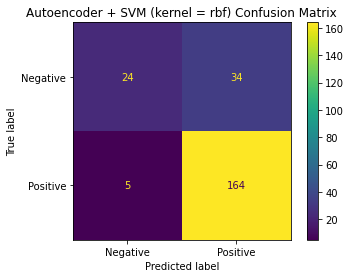

In [109]:
sklearn.metrics.ConfusionMatrixDisplay(CM_en_svm_rbf_model, display_labels = ['Negative', 'Positive']).plot()
plt.title('Autoencoder + SVM (kernel = rbf) Confusion Matrix')

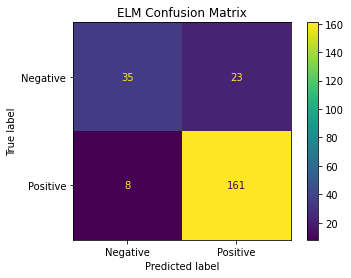

In [110]:
sklearn.metrics.ConfusionMatrixDisplay(CM_elm_model, display_labels = ['Negative', 'Positive'], ).plot()
plt.title('ELM Confusion Matrix')
plt.show()

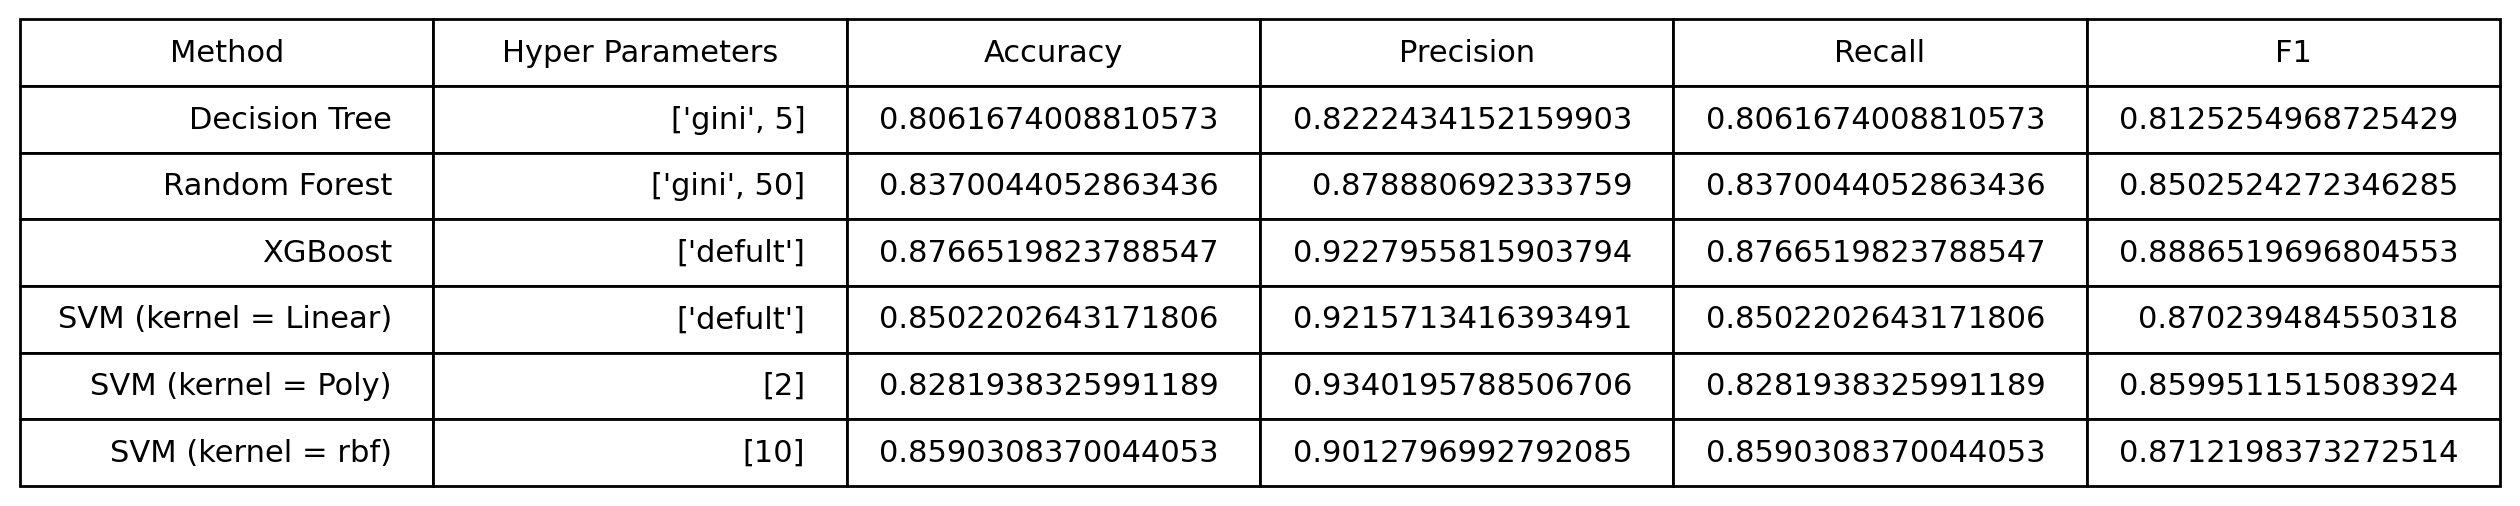

In [111]:
plt.figure(figsize=(8, 1), dpi=200)
table = plt.table(cellText=[
    [
        "Decision Tree",
        list(decision_tree_model.best_params_.values()),
        sklearn.metrics.accuracy_score(y_hat_decision_tree_model, y_test),
        sklearn.metrics.precision_score(y_hat_decision_tree_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_decision_tree_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_decision_tree_model, y_test, average="weighted")
    ],
    [
        "Random Forest",
        list(random_forest_model.best_params_.values()),
        sklearn.metrics.accuracy_score(y_hat_random_forest_model, y_test),
        sklearn.metrics.precision_score(y_hat_random_forest_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_random_forest_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_random_forest_model, y_test, average="weighted")
    ],
    [
        "XGBoost",
        list(['defult']),
        sklearn.metrics.accuracy_score(y_hat_xgboost_model, y_test),
        sklearn.metrics.precision_score(y_hat_xgboost_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_xgboost_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_xgboost_model, y_test, average="weighted")
    ],
    [
        "SVM (kernel = Linear)",
        list(['defult']),
        sklearn.metrics.accuracy_score(y_hat_svm_linear_model, y_test),
        sklearn.metrics.precision_score(y_hat_svm_linear_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_svm_linear_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_svm_linear_model, y_test, average="weighted")
    ],
    [
        "SVM (kernel = Poly)",
        list(svm_poly_model.best_params_.values()),
        sklearn.metrics.accuracy_score(y_hat_svm_poly_model, y_test),
        sklearn.metrics.precision_score(y_hat_svm_poly_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_svm_poly_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_svm_poly_model, y_test, average="weighted")
    ],
    [
        "SVM (kernel = rbf)",
        list(svm_rbf_model.best_params_.values()),
        sklearn.metrics.accuracy_score(y_hat_svm_rbf_model, y_test),
        sklearn.metrics.precision_score(y_hat_svm_rbf_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_svm_rbf_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_svm_rbf_model, y_test, average="weighted")
    ],
], colLabels=["Method", "Hyper Parameters", "Accuracy", "Precision", "Recall", "F1"], loc="center")
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(2, 2)
plt.axis("off")
plt.show()

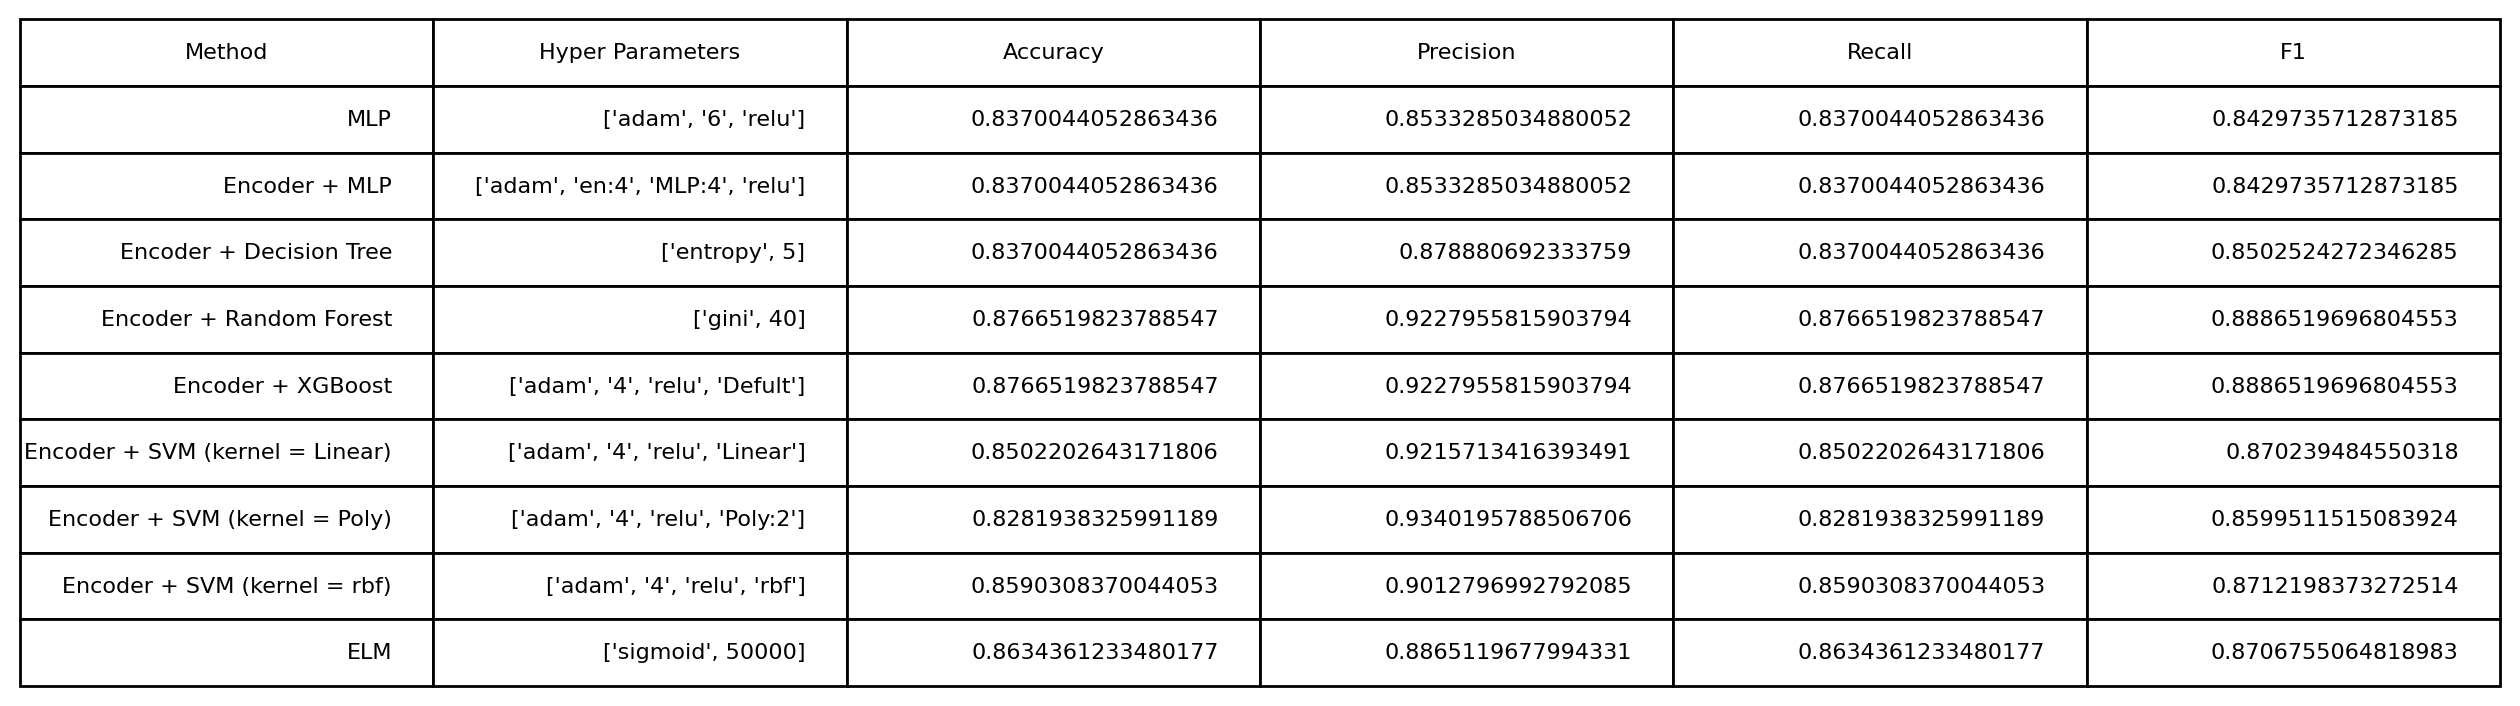

In [113]:
plt.figure(figsize=(8, 1), dpi=200)
table = plt.table(cellText=[
    [
        "MLP",
        list(['adam', '6', 'relu']),
        sklearn.metrics.accuracy_score(y_hat_MLP, y_test),
        sklearn.metrics.precision_score(y_hat_MLP, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_MLP, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_MLP, y_test, average="weighted")
    ],
    [
        "Encoder + MLP",
        list(['adam', 'en:4', 'MLP:4', 'relu']),
        sklearn.metrics.accuracy_score(y_hat_MLP, y_test),
        sklearn.metrics.precision_score(y_hat_MLP, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_MLP, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_MLP, y_test, average="weighted")
    ],
    [
        "Encoder + Decision Tree",
        list(en_decision_tree_model.best_params_.values()),
        sklearn.metrics.accuracy_score(y_hat_random_forest_model, y_test),
        sklearn.metrics.precision_score(y_hat_random_forest_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_random_forest_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_random_forest_model, y_test, average="weighted")
    ],
    [
        "Encoder + Random Forest",
        list(en_random_forest_model.best_params_.values()),
        sklearn.metrics.accuracy_score(y_hat_xgboost_model, y_test),
        sklearn.metrics.precision_score(y_hat_xgboost_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_xgboost_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_xgboost_model, y_test, average="weighted")
    ],
    [
        "Encoder + XGBoost",
        list(['adam', '4', 'relu', 'Defult']),
        sklearn.metrics.accuracy_score(y_hat_xgboost_model, y_test),
        sklearn.metrics.precision_score(y_hat_xgboost_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_xgboost_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_xgboost_model, y_test, average="weighted")
    ],
    [
        "Encoder + SVM (kernel = Linear)",
        list(['adam', '4', 'relu', 'Linear']),
        sklearn.metrics.accuracy_score(y_hat_svm_linear_model, y_test),
        sklearn.metrics.precision_score(y_hat_svm_linear_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_svm_linear_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_svm_linear_model, y_test, average="weighted")
    ],
    [
        "Encoder + SVM (kernel = Poly)",
        list(['adam', '4', 'relu', 'Poly:2']),
        sklearn.metrics.accuracy_score(y_hat_svm_poly_model, y_test),
        sklearn.metrics.precision_score(y_hat_svm_poly_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_svm_poly_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_svm_poly_model, y_test, average="weighted")
    ],
    [
        "Encoder + SVM (kernel = rbf)",
        list(['adam', '4', 'relu', 'rbf']),
        sklearn.metrics.accuracy_score(y_hat_svm_rbf_model, y_test),
        sklearn.metrics.precision_score(y_hat_svm_rbf_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_svm_rbf_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_svm_rbf_model, y_test, average="weighted")
    ],
    [
        "ELM",
        list(elm_model.best_params_.values()),
        sklearn.metrics.accuracy_score(y_hat_elm_model, y_test),
        sklearn.metrics.precision_score(y_hat_elm_model, y_test, average="weighted"),
        sklearn.metrics.recall_score(y_hat_elm_model, y_test, average="weighted"),
        sklearn.metrics.f1_score(y_hat_elm_model, y_test, average="weighted")
    ],
], colLabels=["Method", "Hyper Parameters", "Accuracy", "Precision", "Recall", "F1"], loc="center")
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(2, 2)
plt.axis("off")
plt.show()